In [142]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
def update(x,force,dt,args,xold=[],method=[]):
    """
    Update function.
    """
    if method == "verlet":
        #print(x, xold)
        xnew = 2*x[0]-xold[0]+dt*dt*force(x,*args)
        vnew = (xnew-xold[0])/(2*dt)
        #print(xnew,vnew, dt*dt*force(x,*args))
        return [xnew,vnew]
    else:
        return [x[0]+x[1]*dt,
                x[1]+force(x,*args)*dt]

In [145]:
def hooke(x,k=1):
    return -k*x[0]

def energy(x):
    return x[0]**2+x[1]**2

# Forward difference

In [168]:
dt = 0.001

x0 = [1, 0]
k  = 1.

Niter = 100000

xt = [ x0 ]
for it in range(Niter):
    
    xn = update(xt[-1],hooke, dt, args=(k,))
    #print(xn)
    xt.append(xn)   

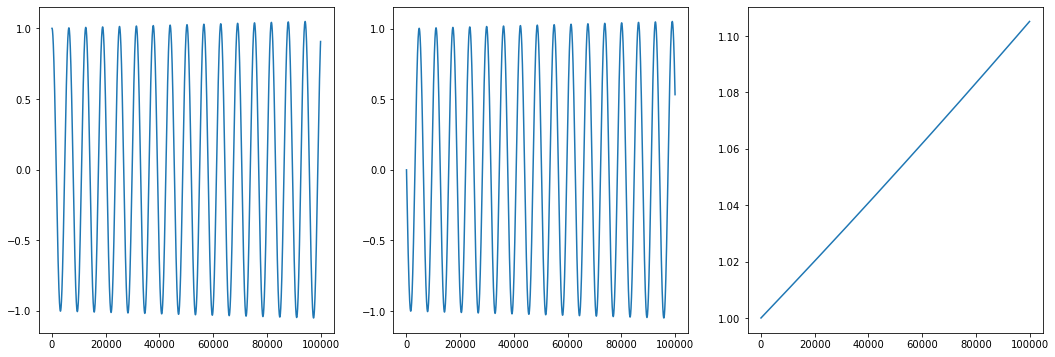

In [169]:
xt = np.array(xt)

ea =[ energy(x) for x in xt[:,] ]

fig, ax = plt.subplots(1,3,figsize=(18,6))

for ia in range(2):
    ax[ia].plot(xt[:,ia])
    
ax[2].plot(ea)

# Verlet

In [159]:
xt = [ x0, x0 ]
for it in range(Niter):
    xn = update(xt[-1],hooke, dt, args=(k,), xold=xt[-2], method='verlet')
    xt.append(xn)   

(0.6, 1.1)

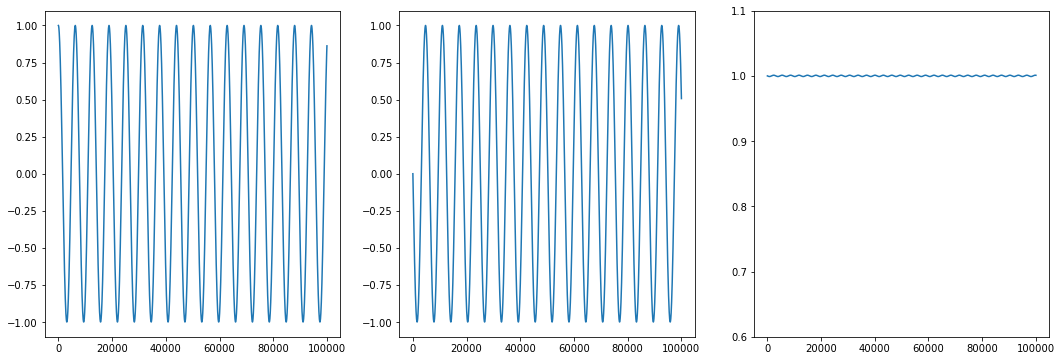

In [160]:
ea =[ energy(x) for x in xt ]

xt = np.array(xt)

fig, ax = plt.subplots(1,3,figsize=(18,6))

for ia in range(2):
    ax[ia].plot(xt[:,ia])
    
ax[2].plot(ea)
ax[2].set_ylim([0.6,1.1])

# Friction

$$
\ddot{x}  = F(x) - \gamma \dot{x}
$$

![8.37](pngs/8_37.png)

$h = dt$

$$
    (1+\gamma h/2) x(h) = 2x(0) - (1-\gamma h/2) x(-h) + h^2 F(0)
$$

$$
\dot{x}(0) = ( x(h) - x(-h) ) / (2h)
$$

In [161]:
def update(x,force,dt,args,γ=0,xold=[],method=[]):
    """
    Update function.
    """
    if method == "verlet":
        γp = 1+γ*dt/2
        γm = 1-γ*dt/2
        #print(x, xold)
        xnew = 2*x[0]-γm*xold[0]+dt*dt*force(x,*args)
        vnew = (xnew-xold[0])/(2*dt)
        #print(xnew,vnew, dt*dt*force(x,*args))
        return [xnew/γp,vnew]
    else:
        return [x[0]+x[1]*dt,x[1]+force(x,*args)*dt]

In [164]:
γ = 0.5
xt = [ x0, x0 ]
for it in range(Niter):
    xn = update(xt[-1],hooke, dt, args=(k,), γ=γ, xold=xt[-2], method='verlet')
    xt.append(xn)   

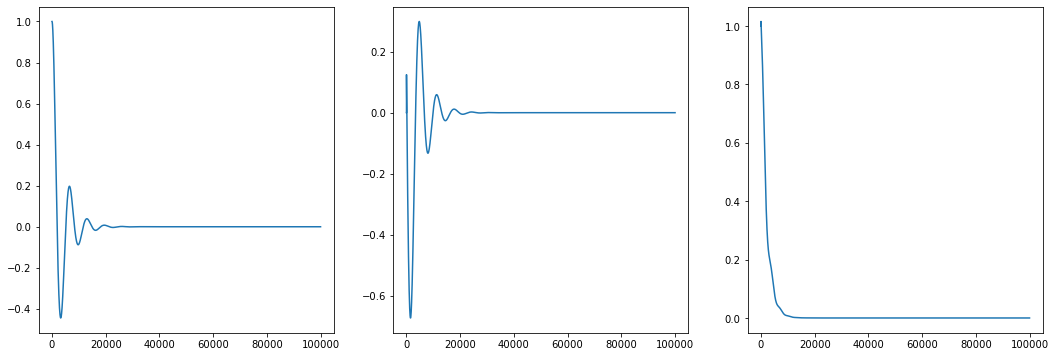

In [165]:
ea =[ energy(x) for x in xt ]
xt = np.array(xt)

fig, ax = plt.subplots(1,3,figsize=(18,6))

for ia in range(2):
    ax[ia].plot(xt[:,ia])
    
ax[2].plot(ea)